In [2]:
!gsutil ls gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series

gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-blue.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-blue/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-green.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-nir.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-red.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-swir1.parquet/
gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-swir2.parquet/


In [3]:
from geolifeclef.utils import get_spark

spark = get_spark()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/06 21:17:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/06 21:17:51 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
24/04/06 21:17:52 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
ts_df = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/sample_time_series/GLC24-PO-train-landsat-time-series-red.parquet/"
)

In [5]:
ts_df.show(truncate=False)

+--------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|surveyId|TimeSeries                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [28]:
sample_row = ts_df.take(4)[1]

In [29]:
import numpy as np
from scipy.fft import dct, idct

In [38]:
ts = np.array(sample_row["TimeSeries"])
x = ts

x_dct = dct(ts)
dct_filter = x_dct.copy()
dct_filter[8:] = 0
x_hat = idct(dct_filter)

Text(0.5, 0, 'Index')

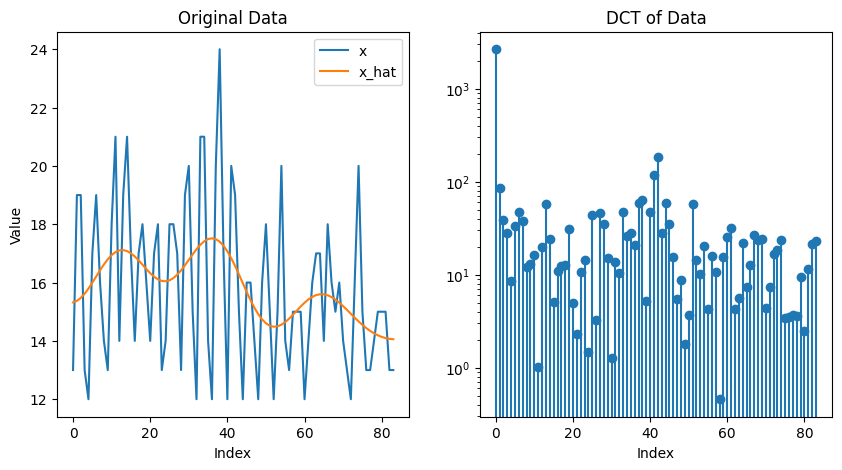

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, label="x")
plt.plot(x_hat, label="x_hat")
plt.legend()
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.yscale("log")
plt.stem(np.abs(x_dct), basefmt=" ")
plt.title("DCT of Data")
plt.xlabel("Index")

In [ ]:
po_df = spark.read.csv(
    "gs://dsgt-clef-geolifeclef-2024/data/downloaded/2024/PresenceOnlyOccurrences/GLC24-PO-metadata-train.csv",
    header=True,
    inferSchema=True,
)